In [2]:
#Basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import warnings
#from tabulate import tabulate

# Data Extraction

In [3]:
df=pd.read_csv('adult_income.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df_original=df.copy()

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
numerical_cols=['fnlwgt','age','capital.gain','capital.loss','hours.per.week','education.num']

## Creating a df to store info about all the columns in dataset

In [11]:
import pandas as pd

# Sample data
data = {'Variable': ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
                    'marital.status', 'occupation', 'relationship', 'race', 'sex',
                    'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
                    'income'],
        'Type': ['Numerical', 'Categorical', 'Numerical', 'Categorical', 'Numerical',
                 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
                 'Numerical', 'Numerical', 'Numerical', 'Categorical', 'Binary'],
        'Segment': ['Demographic', 'Demographic', 'Demographic', 'Education', 'Education',
                    'Marital', 'Occupation', 'Family', 'Demographic', 'Demographic',
                    'Finance', 'Finance', 'Work', 'Demographic', 'Finance'],
        'Expectation': ['Expected trend in relation to income', 'Expected impact on income', 'Expected impact on income',
                        'Expected impact on income', 'Expected trend in relation to income', 'Expected impact on income',
                        'Expected impact on income', 'Expected impact on income', 'Expected impact on income',
                        'Expected impact on income', 'Expected trend in relation to income', 'Expected trend in relation to income',
                        'Expected impact on income', 'Expected impact on income', 'Expected impact on income'],
        'Conclusion': ['No significant trend', 'Certain workclass levels have higher income', 'No significant trend',
                       'Certain education levels have higher income', 'Higher education.num often correlates with higher income',
                       'Marital status can impact income', 'Certain occupations have higher income', 'Certain relationships have higher income',
                       'No significant trend', 'Males often have higher income', 'Higher capital gain often correlates with higher income',
                       'Higher capital loss often correlates with lower income', 'No significant trend', 'No significant trend',
                       'Income is mostly affected by other variables'],
        'Comments': ['Additional analysis needed', 'Further investigation required', 'Data quality issues', 'Validated through statistical tests',
                     'Confirmed through correlation analysis', 'Insights from domain knowledge', 'Supporting insights from domain knowledge',
                     'Reinforced by statistical tests', 'Further investigation required', 'Confirmed through analysis', 'Verified through data analysis',
                     'Verified through data analysis', 'No significant correlation found', 'No significant correlation found',
                     'Confirmed through analysis']
        }

# Create a DataFrame
df_assumption = pd.DataFrame(data)

# Display the DataFrame
df_assumption.head(15)


,Variable,Type,Segment,Expectation,Conclusion,Comments
0,age,Numerical,Demographic,Expected trend in relation to income,No significant trend,Additional analysis needed
1,workclass,Categorical,Demographic,Expected impact on income,Certain workclass levels have higher income,Further investigation required
2,fnlwgt,Numerical,Demographic,Expected impact on income,No significant trend,Data quality issues
3,education,Categorical,Education,Expected impact on income,Certain education levels have higher income,Validated through statistical tests
4,education.num,Numerical,Education,Expected trend in relation to income,Higher education.num often correlates with hig...,Confirmed through correlation analysis
5,marital.status,Categorical,Marital,Expected impact on income,Marital status can impact income,Insights from domain knowledge
6,occupation,Categorical,Occupation,Expected impact on income,Certain occupations have higher income,Supporting insights from domain knowledge
7,relationship,Categorical,Family,Expected impact on income,Certain relationships have higher income,Reinforced by statistical tests
8,race,Categorical,Demographic,Expected impact on income,No significant trend,Further investigation required
9,sex,Categorical,Demographic,Expected impact on income,Males often have higher income,Confirmed through analysis


## Number of unique values in numerical columns

In [12]:
df[numerical_cols].nunique()

fnlwgt            21648
age                  73
capital.gain        119
capital.loss         92
hours.per.week       94
education.num        16
dtype: int64

## Applying value_counts() function on every column except numerical columns

In [13]:
# Get value counts for all columns
value_count_tables = []
for column in df.drop(columns=numerical_cols).columns:
    value_counts = df[column].value_counts()
    count_table = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})
    value_count_tables.append((column, count_table))

# Tabulate the value counts for all columns
formatted_tables = []
for column, count_table in value_count_tables:
    table = tabulate(count_table, headers='keys', tablefmt='grid')
    formatted_tables.append((column, table))

# Print the formatted tables
for column, table in formatted_tables:
    print(f"Value counts for '{column}':")
    print(table)
    print("\n")


NameError: name 'tabulate' is not defined

In [14]:
df.replace('?', np.nan, inplace=True)



In [15]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## Encoding columns to visualize relationships 

In [16]:
binary_columns=['income','sex']
multi_class_columns=['native.country','race','relationship','occupation','marital.status','education','workclass']

In [17]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [19]:
df['income'].unique()[0]

'<=50K'

## Frequency encoding of multi category variables

In [18]:
# Create a dictionary to store the frequency counts for each category in each column
frequency_mapping = {}

# Create a dictionary to store the encoding for each category in each column
encoding_dict = {}

# Compute the frequency counts for each column
for column in multi_class_columns:
    frequency_mapping[column] = df[column].value_counts(normalize=True)

# Create a function to apply frequency encoding to a given column
def apply_frequency_encoding(column):
    encoding = {}
    value_counts = df[column].value_counts(normalize=True)
    for category, frequency in value_counts.items():
        encoding[category] = frequency
    encoding_dict[column] = encoding
    return df[column].map(frequency_mapping[column])

# Apply frequency encoding to the specified columns
for column in multi_class_columns:
    df[column] = apply_frequency_encoding(column)

# Print the encoded DataFrame
print(df.head())

# Print the encoding dictionary
print("Encoding Dictionary:")
print(encoding_dict)


   age  workclass  fnlwgt  education  education.num  marital.status  \
0   90        NaN   77053   0.322502              9        0.030497   
1   82   0.738682  132870   0.322502              9        0.030497   
2   66        NaN  186061   0.223918             10        0.030497   
3   54   0.738682  140359   0.019840              4        0.136452   
4   41   0.738682  264663   0.223918             10        0.031479   

   occupation  relationship      race     sex  capital.gain  capital.loss  \
0         NaN      0.255060  0.854274  Female             0          4356   
1    0.132365      0.255060  0.854274  Female             0          4356   
2         NaN      0.105832  0.095943  Female             0          4356   
3    0.065174      0.105832  0.854274  Female             0          3900   
4    0.134774      0.155646  0.854274  Female             0          3900   

   hours.per.week  native.country income  
0              40         0.91219  <=50K  
1              18       

## Encoding 2 class columns into binary columns

In [21]:
# Encode 'income' column
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['sex'] = df['sex'].apply(lambda x: 0 if x =='Male' else 1)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,0.322502,9,0.030497,NaN,0.255060,0.854274,1,0,4356,40,0.91219,0
1,82,0.738682,132870,0.322502,9,0.030497,0.132365,0.255060,0.854274,1,0,4356,18,0.91219,0
2,66,NaN,186061,0.223918,10,0.030497,NaN,0.105832,0.095943,1,0,4356,40,0.91219,0
3,54,0.738682,140359,0.019840,4,0.136452,0.065174,0.105832,0.854274,1,0,3900,40,0.91219,0
4,41,0.738682,264663,0.223918,10,0.031479,0.134774,0.155646,0.854274,1,0,3900,40,0.91219,0


## Analyzing the target column

In [22]:
df['income'].describe()

count    32561.000000
mean         0.240810
std          0.427581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12084\4150736454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income']);


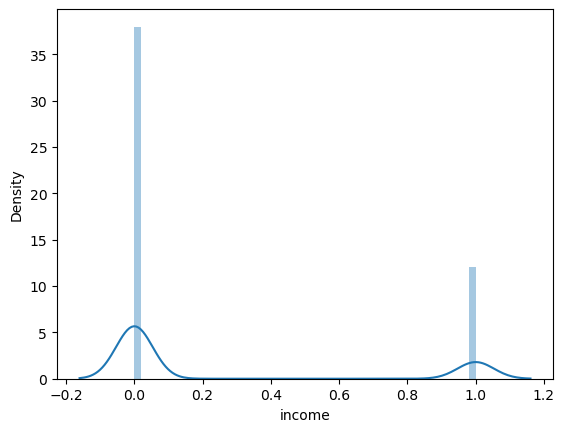

In [23]:
sns.distplot(df['income']);


In [24]:
#skewness and kurtosis
print("Skewness: %f" % df['income'].skew())
print("Kurtosis: %f" % df['income'].kurt())

Skewness: 1.212430
Kurtosis: -0.530045


## Plotting relationships of target column with all columns

In [25]:
numerical_cols=['fnlwgt','age','capital.gain','capital.loss','hours.per.week','education.num']

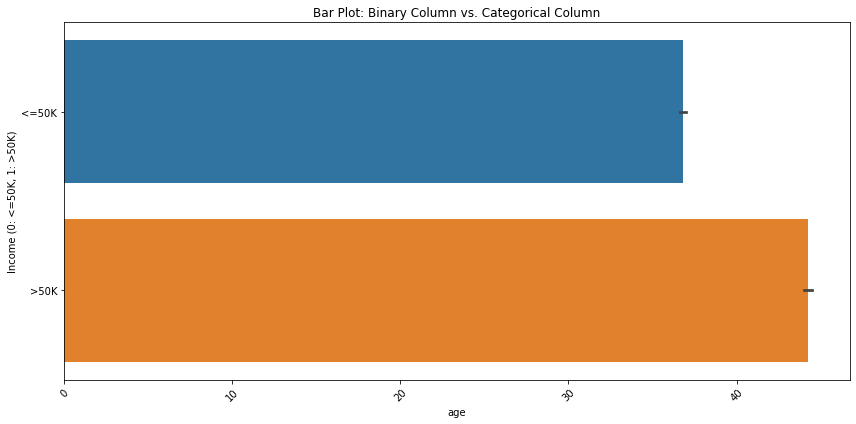

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('age')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

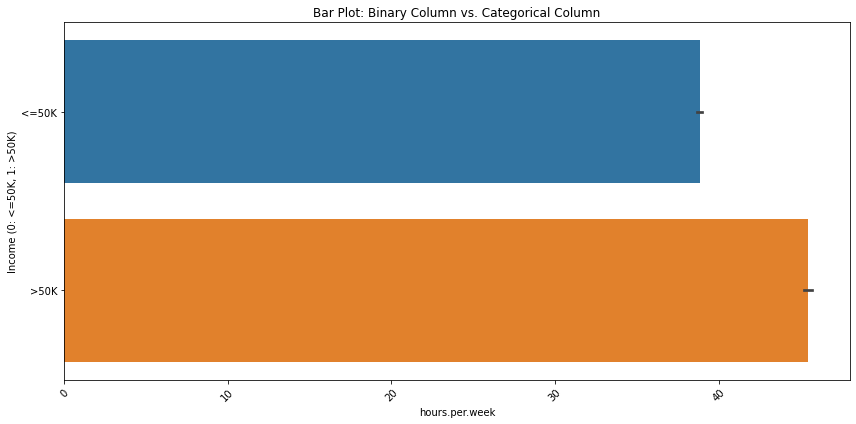

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hours.per.week', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('hours.per.week')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

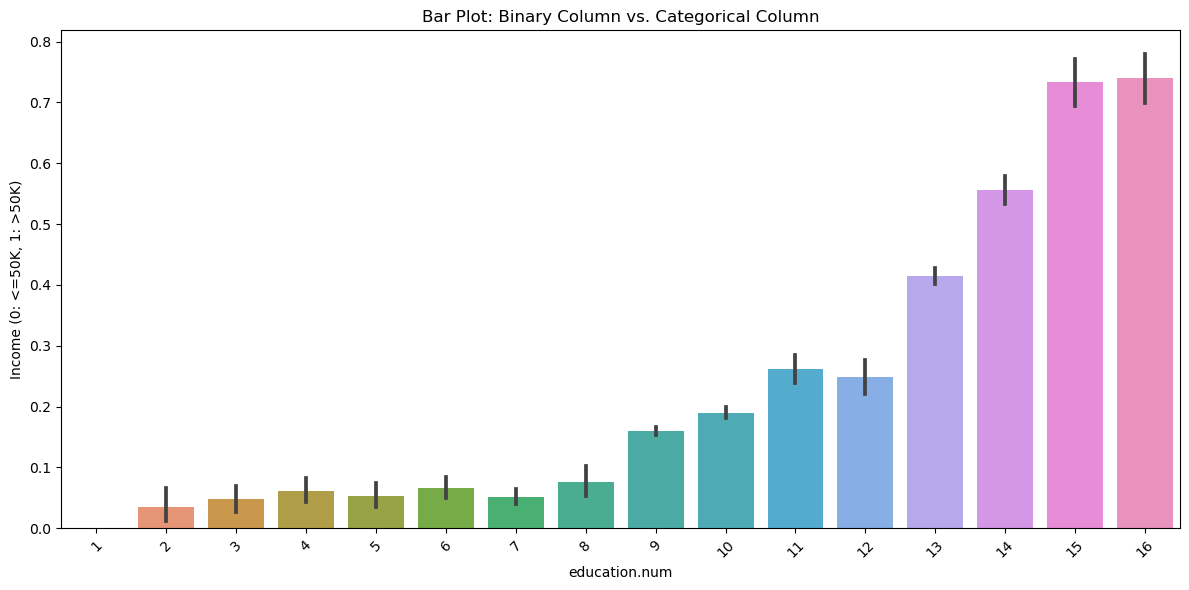

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='education.num', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('education.num')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

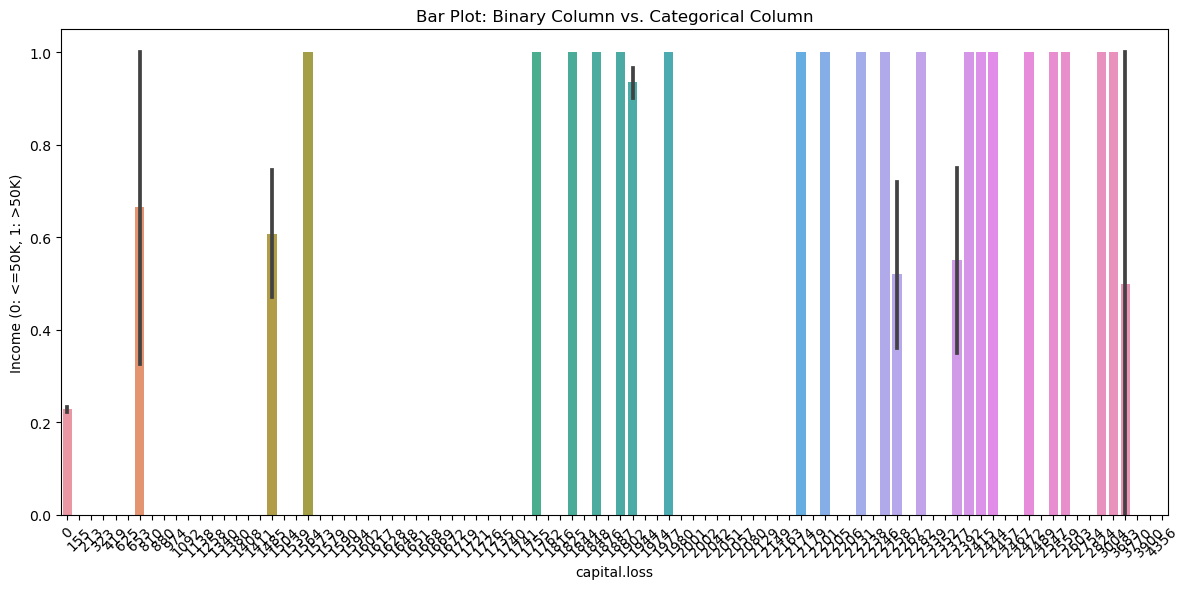

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='capital.loss', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('capital.loss')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

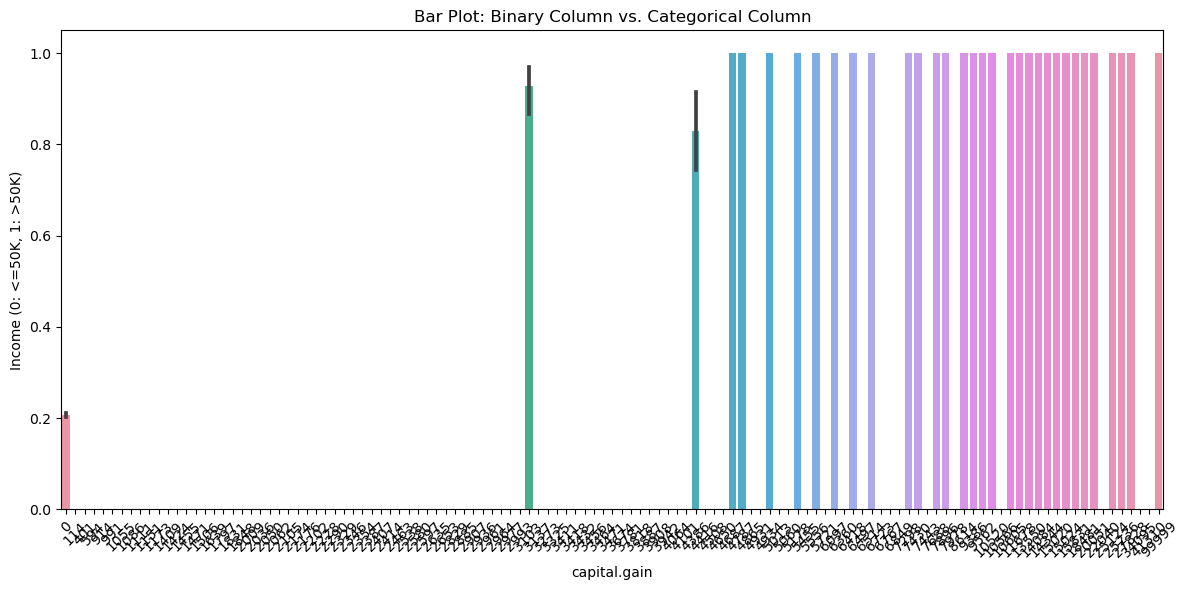

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='capital.gain', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('capital.gain')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [31]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [32]:
print(encoding_dict['marital.status'])

{'Married-civ-spouse': 0.4599367341297872, 'Never-married': 0.328091889069746, 'Divorced': 0.1364515831823347, 'Separated': 0.03147937716900587, 'Widowed': 0.030496606369583245, 'Married-spouse-absent': 0.012837443567458001, 'Married-AF-spouse': 0.0007063665120850096}


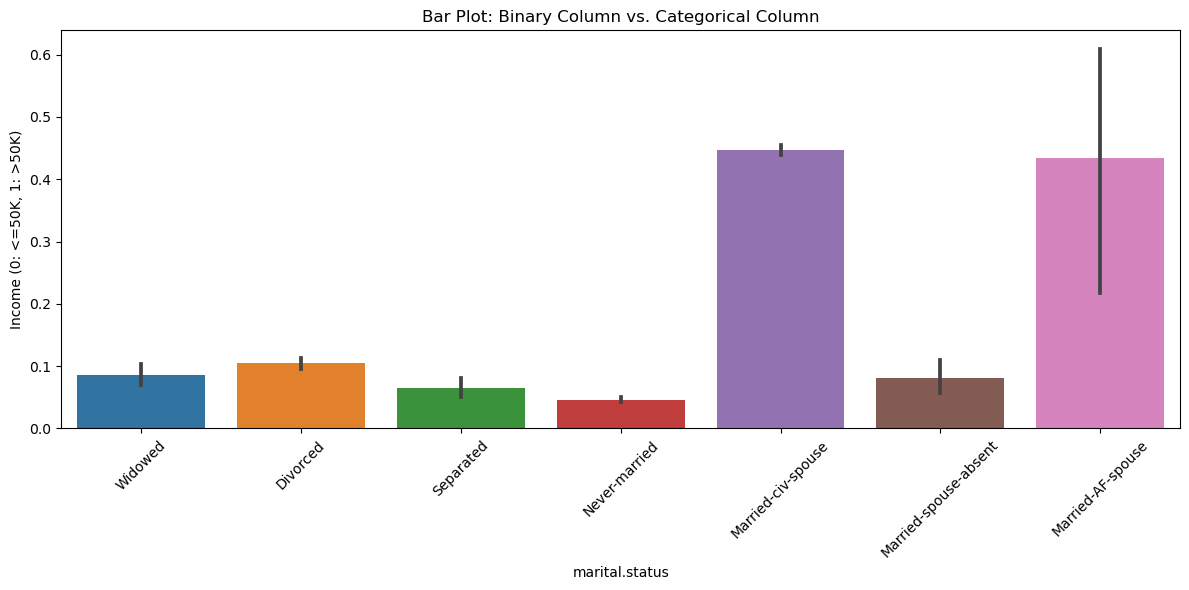

In [33]:

# Invert the encoding dictionary to get category names from encoded values
decoded_encoding_dict = {col: {v: k for k, v in col_dict.items()} for col, col_dict in encoding_dict.items()}

# Decode the 'marital.status' column values in the DataFrame
df['marital.status'] = df['marital.status'].map(decoded_encoding_dict['marital.status'])

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='marital.status', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('marital.status')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


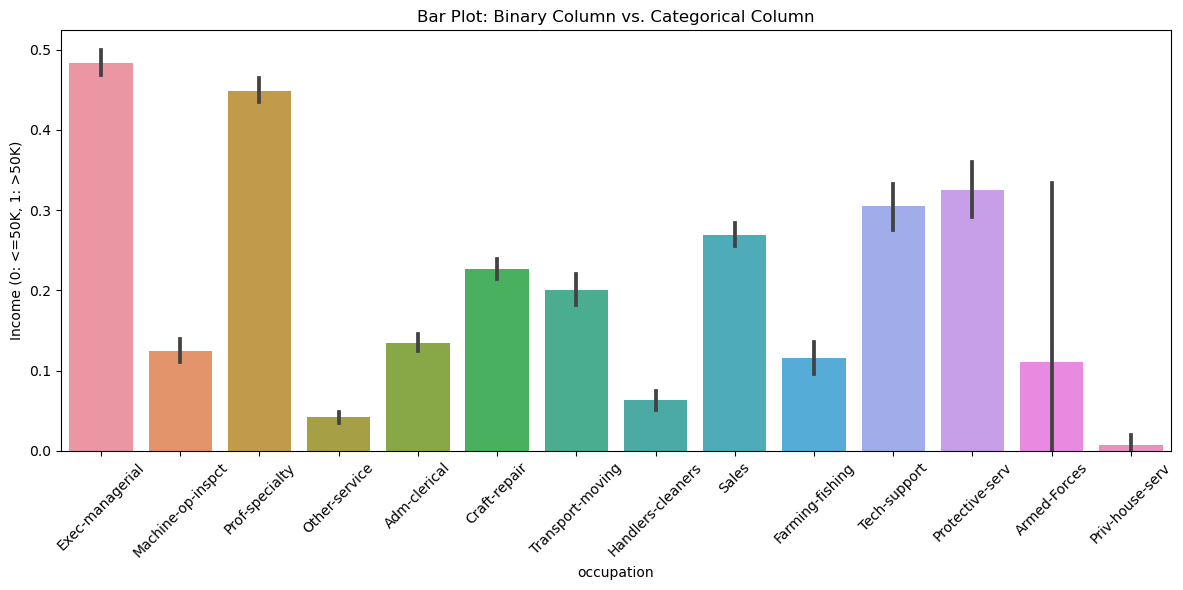

In [34]:

# Invert the encoding dictionary to get category names from encoded values
decoded_encoding_dict = {col: {v: k for k, v in col_dict.items()} for col, col_dict in encoding_dict.items()}

# Decode the 'marital.status' column values in the DataFrame
df['occupation'] = df['occupation'].map(decoded_encoding_dict['occupation'])

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('occupation')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



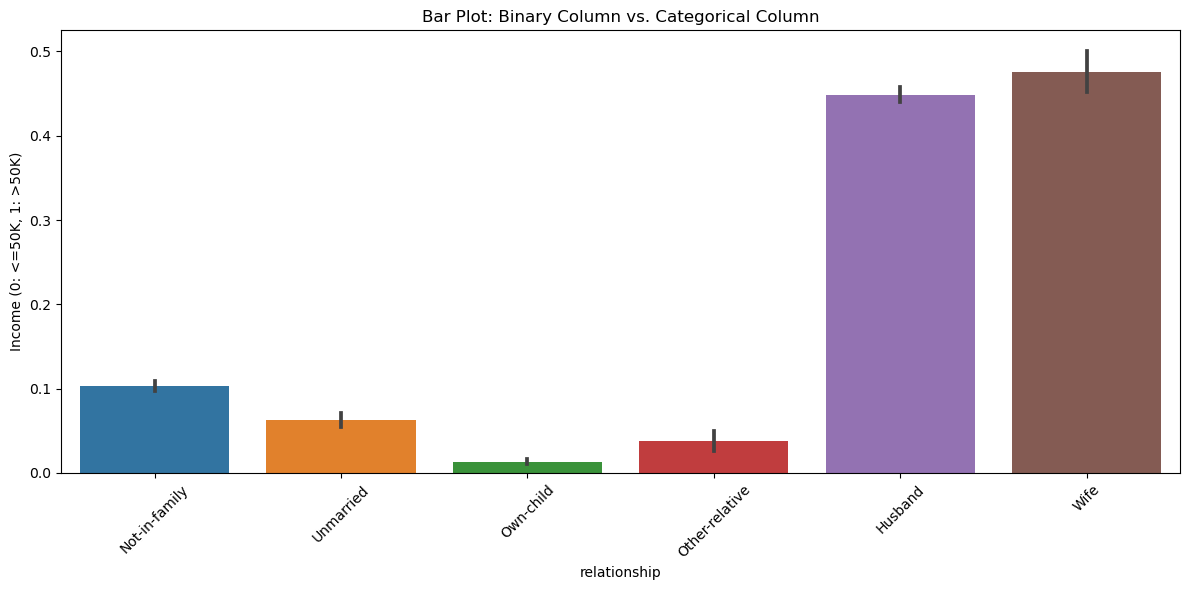

In [35]:

# Invert the encoding dictionary to get category names from encoded values
decoded_encoding_dict = {col: {v: k for k, v in col_dict.items()} for col, col_dict in encoding_dict.items()}

# Decode the 'marital.status' column values in the DataFrame
df['relationship'] = df['relationship'].map(decoded_encoding_dict['relationship'])


# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='relationship', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('relationship')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

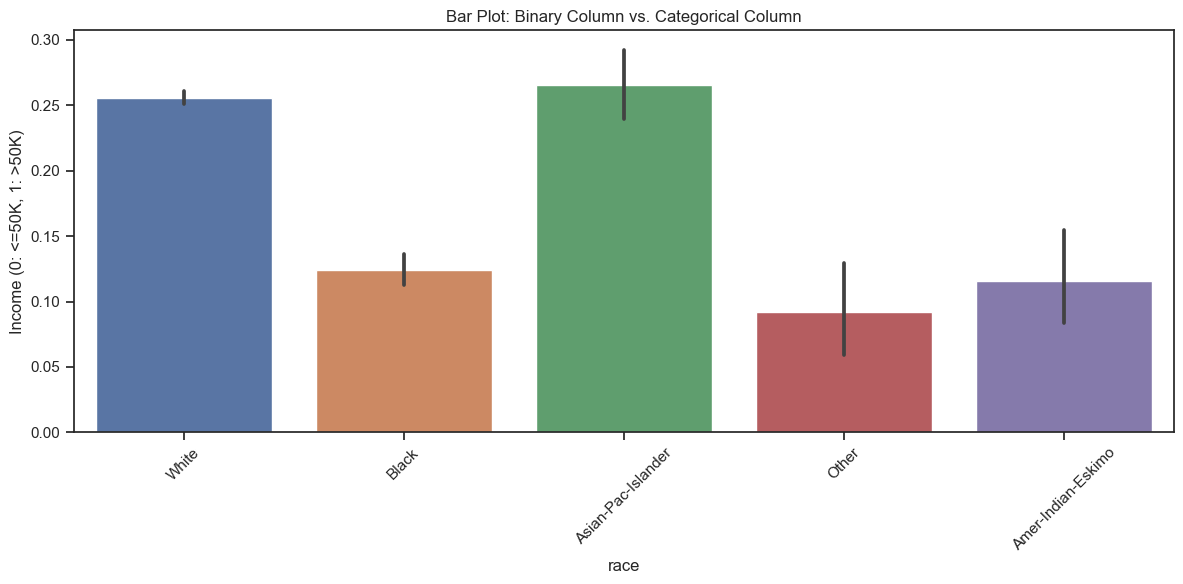

In [51]:
# Invert the encoding dictionary to get category names from encoded values
decoded_encoding_dict = {col: {v: k for k, v in col_dict.items()} for col, col_dict in encoding_dict.items()}

# Decode the 'marital.status' column values in the DataFrame
df['race'] = df['race'].map(decoded_encoding_dict['race'])


# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='race', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('race')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
df['sex'].value_counts()

0    21790
1    10771
Name: sex, dtype: int64

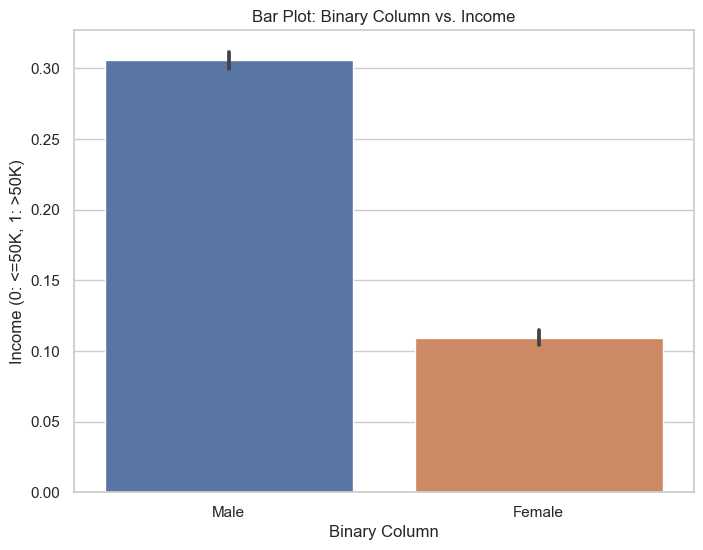

In [39]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# Bar plot (binary column against income)
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Income')
plt.xlabel('Binary Column')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks([0, 1], ['Male', 'Female'])  # Add custom tick labels
plt.show()

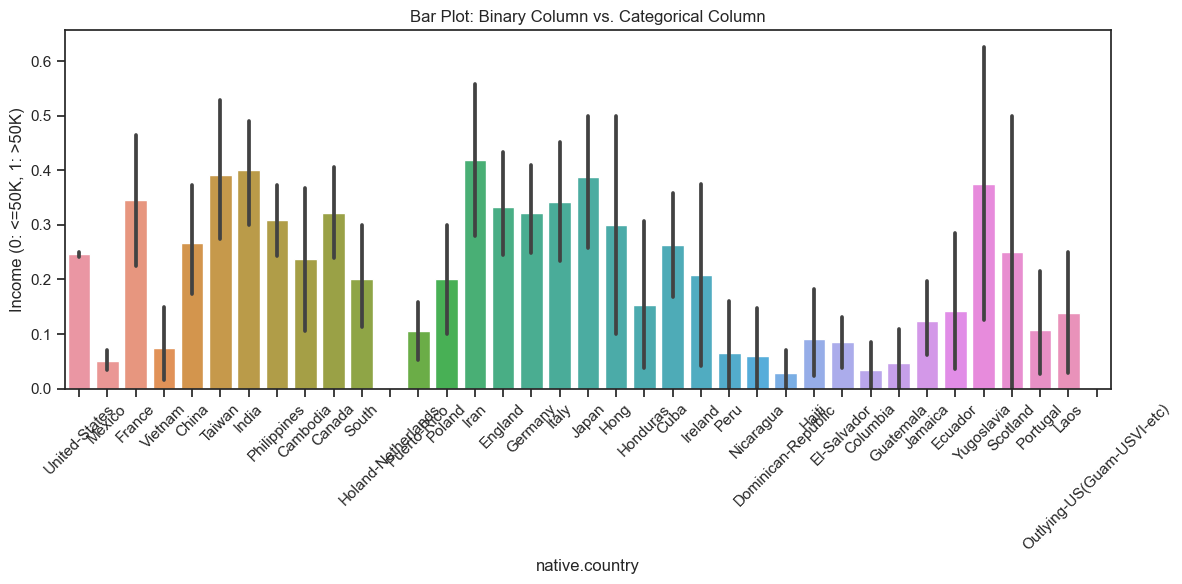

In [52]:
# Invert the encoding dictionary to get category names from encoded values
decoded_encoding_dict = {col: {v: k for k, v in col_dict.items()} for col, col_dict in encoding_dict.items()}

# Decode the 'marital.status' column values in the DataFrame
df['native.country'] = df['native.country'].map(decoded_encoding_dict['native.country'])


# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='native.country', y='income', data=df)
plt.title('Bar Plot: Binary Column vs. Categorical Column')
plt.xlabel('native.country')
plt.ylabel('Income (0: <=50K, 1: >50K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation matrix

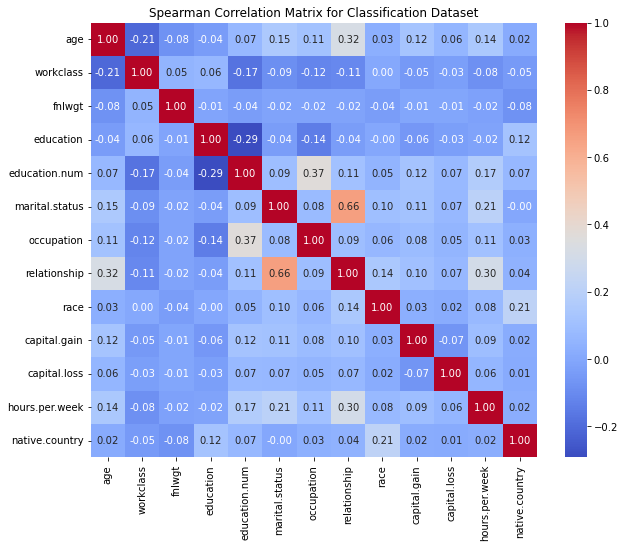

In [21]:

# Calculate Spearman correlation matrix
spearman_corr_matrix = df.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Spearman Correlation Matrix for Classification Dataset')
plt.show()

## Missing Data 

In [22]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
occupation,1843,0.056601
workclass,1836,0.056386
native.country,583,0.017905
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
education.num,0,0.000000
marital.status,0,0.000000
relationship,0,0.000000
race,0,0.000000


## Handling Missing Values : Mode Imputation

In [23]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,0.322502,9,0.030497,NaN,0.255060,0.854274,Female,0,4356,40,0.91219,<=50K
1,82,0.738682,132870,0.322502,9,0.030497,0.132365,0.255060,0.854274,Female,0,4356,18,0.91219,<=50K
2,66,NaN,186061,0.223918,10,0.030497,NaN,0.105832,0.095943,Female,0,4356,40,0.91219,<=50K
3,54,0.738682,140359,0.019840,4,0.136452,0.065174,0.105832,0.854274,Female,0,3900,40,0.91219,<=50K
4,41,0.738682,264663,0.223918,10,0.031479,0.134774,0.155646,0.854274,Female,0,3900,40,0.91219,<=50K


In [24]:

# Columns with missing values
categorical_cols = ['workclass', 'native.country','occupation']

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify that column names match after stripping spaces
print("Stripped Column Names:", df.columns.tolist())

# Fill missing values with mode
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Print filled DataFrame
print(df)




Stripped Column Names: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
       age  workclass  fnlwgt  education  education.num  marital.status  \
0       90   0.738682   77053   0.322502              9        0.030497   
1       82   0.738682  132870   0.322502              9        0.030497   
2       66   0.738682  186061   0.223918             10        0.030497   
3       54   0.738682  140359   0.019840              4        0.136452   
4       41   0.738682  264663   0.223918             10        0.031479   
...    ...        ...     ...        ...            ...             ...   
32556   22   0.738682  310152   0.223918             10        0.328092   
32557   27   0.738682  257302   0.032769             12        0.459937   
32558   40   0.738682  154374   0.322502              9        0.459937   
32559   58   0.738682  15

In [45]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Finding Outliers in numeric columns

In [25]:
# List of columns to process
columns_to_process = ['fnlwgt', 'capital.loss', 'capital.gain']

# Loop through each column
for col in columns_to_process:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print("No. Outliers in '{}' column: {}".format(col, outliers[col].count()))
    print("Maximum value in '{}' column: {}".format(col, outliers[col].max()))
    print("Minimum value in '{}' column: {}".format(col, outliers[col].min()))
    print("Outliers in '{}' column:".format(col))
    
    print("---------------------------------")


No. Outliers in 'fnlwgt' column: 152
Maximum value in 'fnlwgt' column: 1484705
Minimum value in 'fnlwgt' column: 595000
Outliers in 'fnlwgt' column:
---------------------------------
No. Outliers in 'capital.loss' column: 1519
Maximum value in 'capital.loss' column: 4356
Minimum value in 'capital.loss' column: 155
Outliers in 'capital.loss' column:
---------------------------------
No. Outliers in 'capital.gain' column: 2712
Maximum value in 'capital.gain' column: 99999
Minimum value in 'capital.gain' column: 114
Outliers in 'capital.gain' column:
---------------------------------


In [47]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### Checking the class imbalance for all categorical variables

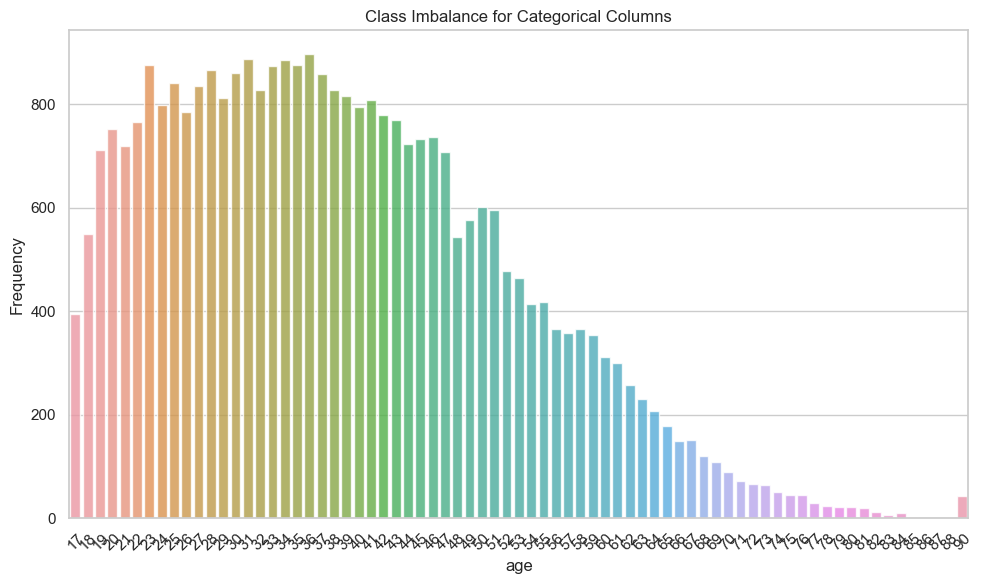

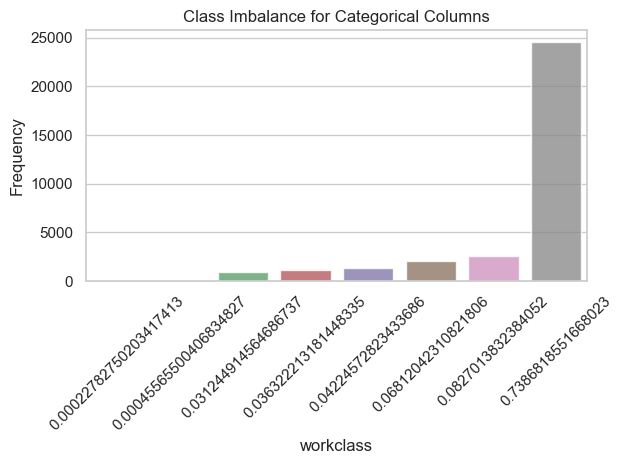

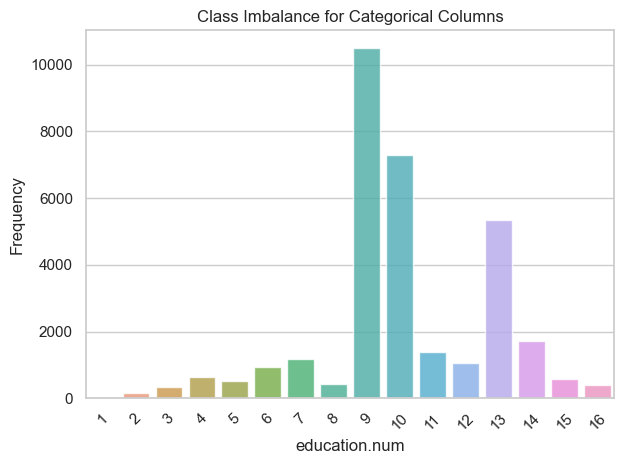

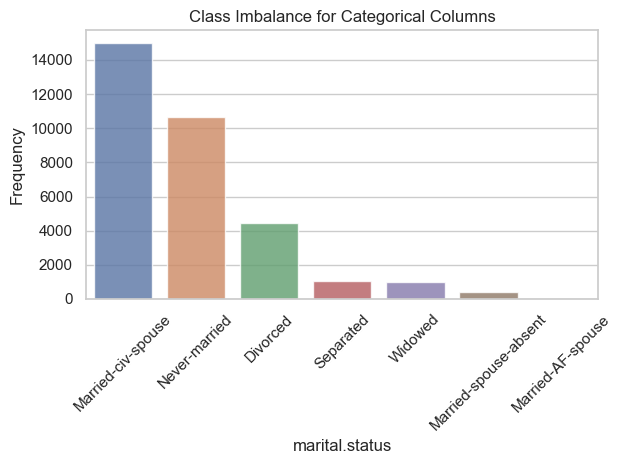

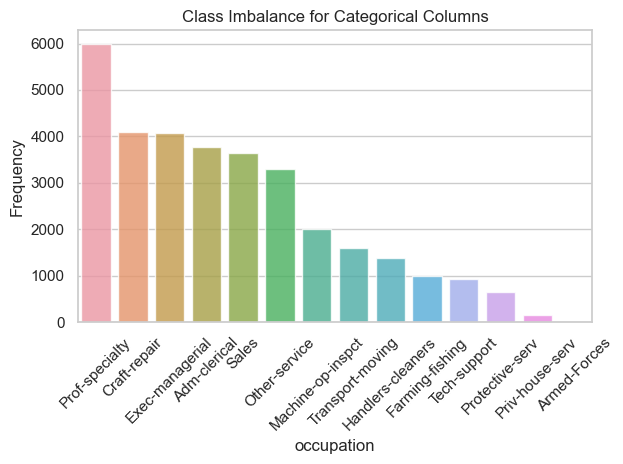

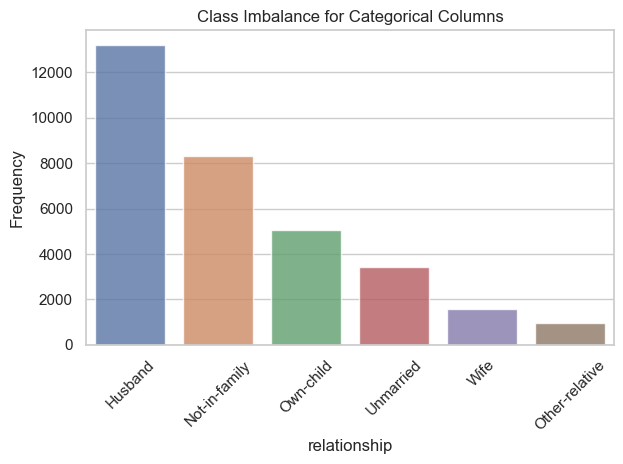

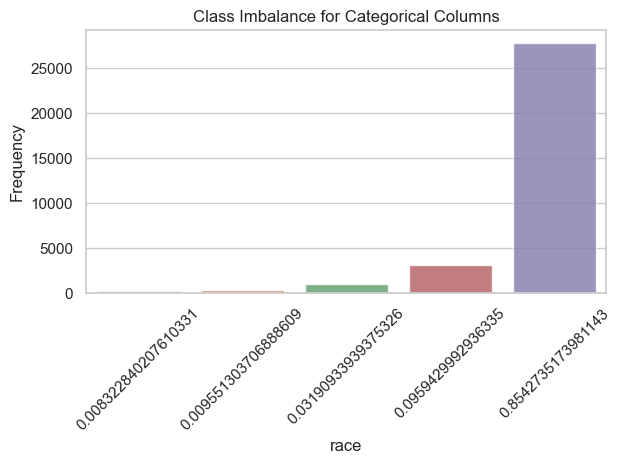

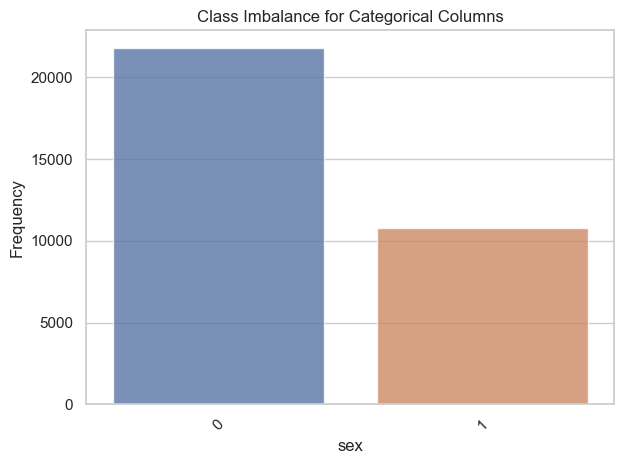

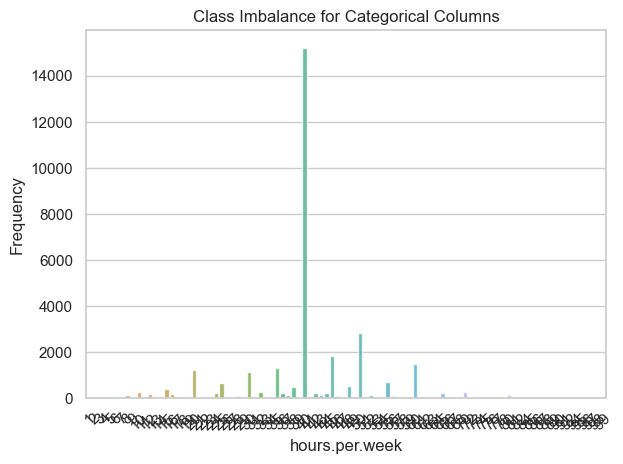

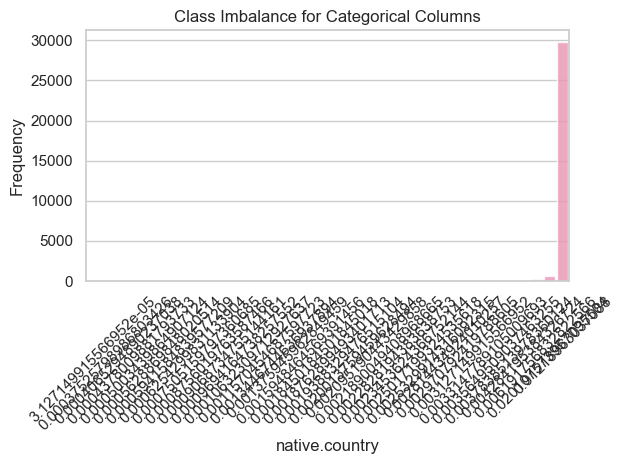

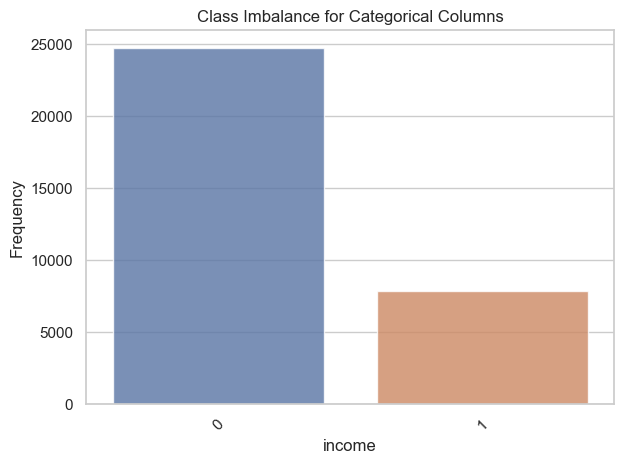

In [48]:
# Calculate class frequencies
categorical_cols=['age', 'workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'hours.per.week', 'native.country', 'income']
class_imbalance = {}
for col in categorical_cols:
    class_counts = df[col].value_counts()
    class_imbalance[col] = class_counts

# Plot class imbalance
plt.figure(figsize=(10, 6))
for col, counts in class_imbalance.items():
    sns.barplot(x=counts.index, y=counts.values, alpha=0.8)
    plt.title('Class Imbalance for Categorical Columns')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


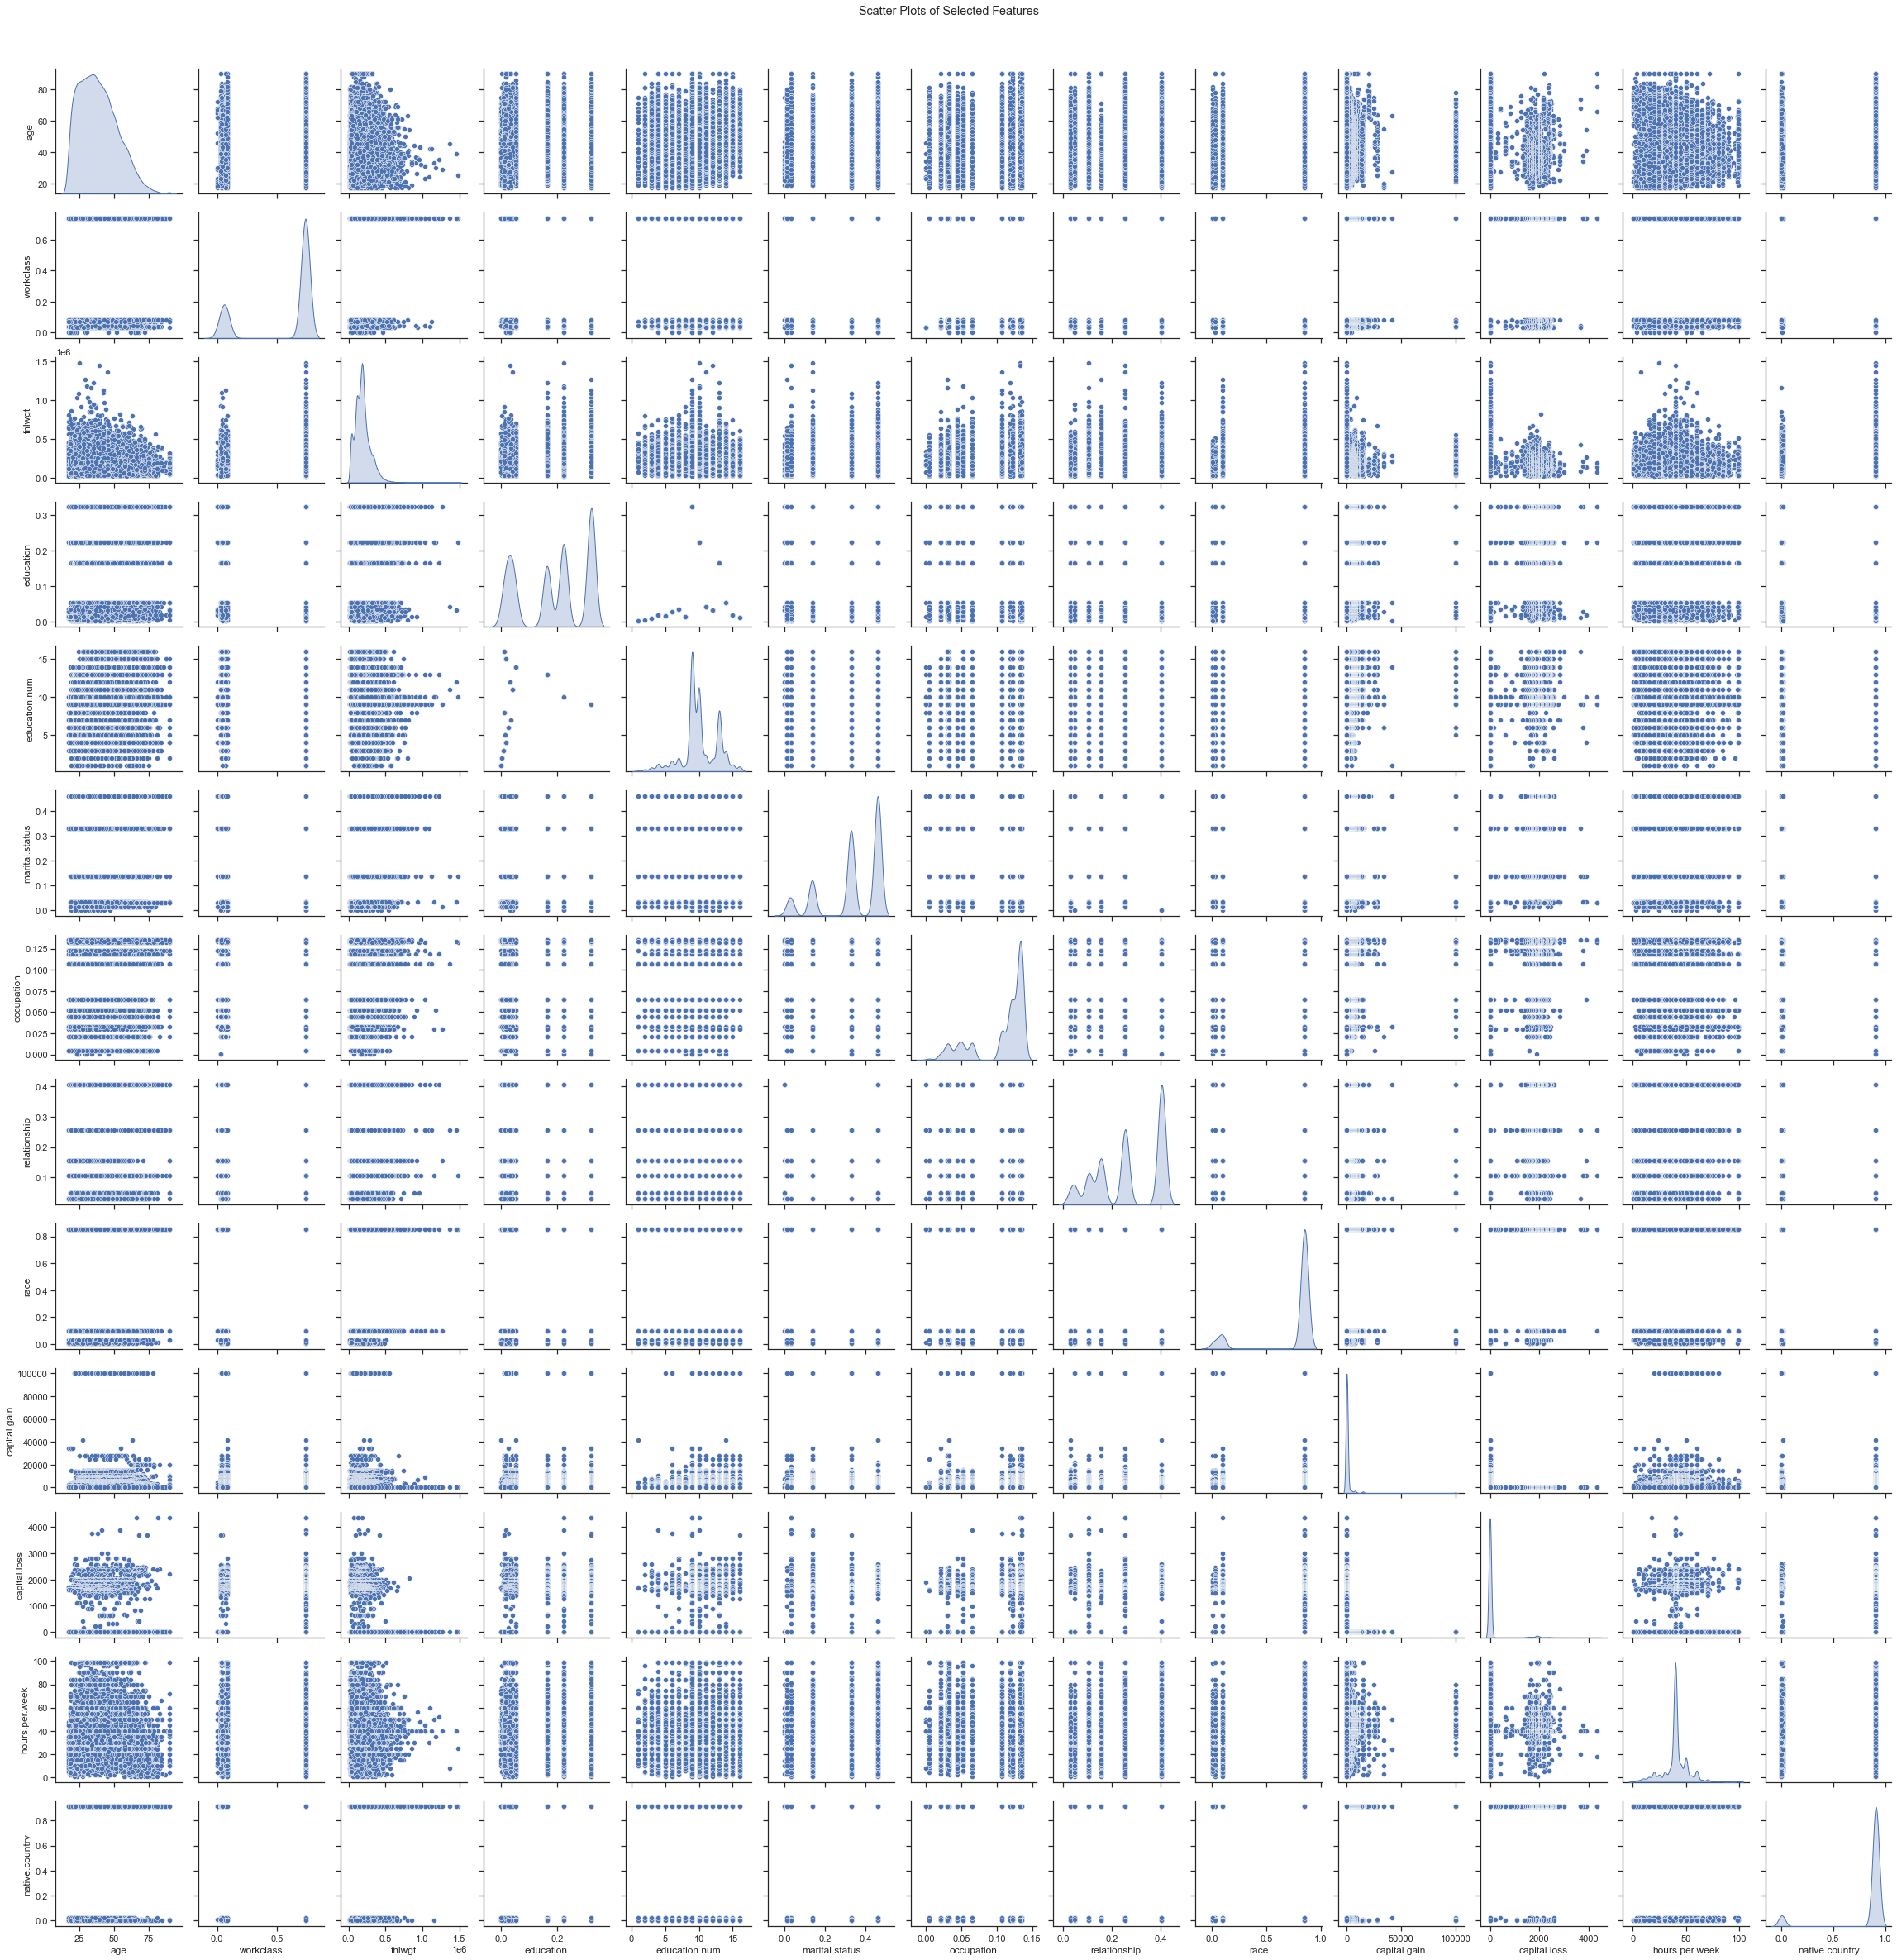

In [28]:
# Select columns for analysis
selected_columns = df.columns

# Scatter Plots (Pairs of Features)
sns.set(style="ticks")
sns.pairplot(df[selected_columns], diag_kind="kde")
plt.suptitle("Scatter Plots of Selected Features", y=1.02)
plt.show()